# Lecture 9: Neural Networks

**Introduction to Neural Networks**

<img src='img/brain.png'/>

### What Are Neural Networks?
Neural networks are a type of machine learning model inspired by the structure and function of the human brain. Just as our brain processes information through interconnected neurons, neural networks process data through layers of interconnected nodes, called artificial neurons.

### Why Are Neural Networks Important?
Neural networks are powerful tools for solving complex problems. They are behind many modern technologies we use daily, such as:
- **Image Recognition**: Identifying objects, faces, or text in images.
- **Language Translation**: Converting text from one language to another (e.g., Google Translate).
- **Autonomous Vehicles**: Helping cars understand and react to their surroundings.

### How Do They Work? (High-Level Overview)
1. **Inputs**: Data enters the network through input neurons.
2. **Processing**: Data moves through layers of neurons, which apply mathematical operations and transformations.
3. **Outputs**: The final layer produces predictions or decisions based on the input data.

For example, imagine teaching a neural network to recognize handwritten numbers. You show it images of digits, and over time, it learns patterns to correctly identify them, much like a child learns to read numbers.

### Key Features
- **Learning from Data**: Neural networks improve their performance as they are exposed to more examples.
- **Adaptability**: They can solve diverse problems, from diagnosing diseases to generating realistic images.

### Where are Neural Network used?

Medical Imaging: Neural networks are used for diagnosing diseases by analyzing medical images, such as detection of brain tumor on MRIs.

Drug Discovery: DeepMind’s AlphaFold predicts protein folding with high accuracy, aiding drug development.


Driving Systems: Tesla’s Autopilot uses neural networks to detect lanes, recognize traffic signs, and avoid obstacles.

Language Translation: Google Translate uses transformer-based neural networks like BERT for highly accurate translations.

Chatbots and Virtual Assistants: OpenAI’s GPT models, including ChatGPT, are based on neural networks.

Finance: PayPal uses neural networks to detect anomalous behaviors in financial transactions.

Credit scoring: Neural networks analyze credit history and financial data for personalized lending.

Wildlife conservation: Conservation organizations use neural networks to identify species and track movements.

<IPython.core.display.Javascript object>


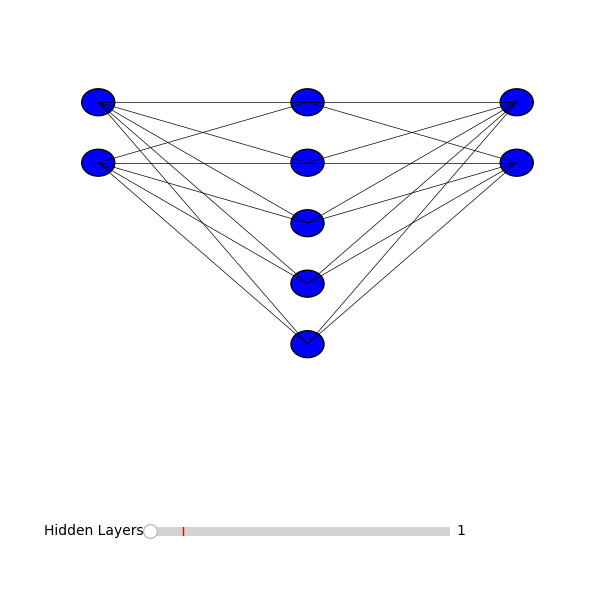

In [4]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
%matplotlib notebook
def draw_neural_net(ax, layer_sizes):
    """
    Draws a neural network diagram.
    Args:
        ax: matplotlib axis to draw on.
        layer_sizes: List with the number of neurons in each layer.
    """
    ax.clear()
    ax.axis("off")

    # Define spacing for layers and neurons
    v_spacing = 0.8 / float(max(layer_sizes))  # Vertical spacing
    h_spacing = 0.9 / float(len(layer_sizes) - 1)  # Horizontal spacing

    # Draw nodes
    for i, layer_size in enumerate(layer_sizes):
        for j in range(layer_size):
            x = i * h_spacing + 0.05  # Horizontal position
            y = 1 - (j * v_spacing + v_spacing / 2)  # Vertical position
            circle = plt.Circle((x, y), v_spacing / 4.5, color='blue', ec='black', lw=1)
            ax.add_artist(circle)

    # Draw edges
    for i, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        for j in range(layer_size_a):
            for k in range(layer_size_b):
                x_start = i * h_spacing + 0.05
                y_start = 1 - (j * v_spacing + v_spacing / 2)
                x_end = (i + 1) * h_spacing + 0.05
                y_end = 1 - (k * v_spacing + v_spacing / 2)
                line = plt.Line2D([x_start, x_end], [y_start, y_end], color='black', lw=0.5)
                ax.add_artist(line)

# Initial configuration
layer_sizes = [3, 5, 4, 2]

fig, ax = plt.subplots(figsize=(6, 6))
plt.subplots_adjust(bottom=0.25)
draw_neural_net(ax, layer_sizes)

# Slider for adjusting the number of hidden layers
ax_slider = plt.axes([0.25, 0.1, 0.5, 0.03], facecolor="lightgoldenrodyellow")
slider = Slider(ax_slider, "Hidden Layers", 1, 10, valinit=2, valstep=1)

def update(val):
    num_hidden_layers = int(slider.val)
    layer_sizes_new = [2] + [5] * num_hidden_layers + [2]  # Input, hidden, output
    draw_neural_net(ax, layer_sizes_new)
    fig.canvas.draw_idle()

slider.on_changed(update)

plt.show()


**The Anatomy of a Neural Network**

### Building Blocks of a Neural Network
1. **Neurons (Nodes)**:
   - Each neuron takes one or more inputs, processes them using a mathematical function, and produces an output.
   - Example: A neuron can calculate a weighted sum of inputs and apply an activation function to introduce non-linearity.

2. **Layers**:
   - **Input Layer**: Receives raw data (e.g., pixel values of an image).
   - **Hidden Layers**: Perform intermediate computations to detect patterns and features.
   - **Output Layer**: Produces the final prediction or classification.

3. **Weights and Biases**:
   - **Weights**: Represent the importance of each input to a neuron.
   - **Bias**: Helps adjust the output along with the weighted sum, ensuring flexibility.


### How Data Flows
1. **Forward Propagation**:
   - Data flows from the input layer to the output layer through the hidden layers.
   - Each neuron processes data using its weights, biases, and activation function.

2. **Activation Functions**:
   - Add non-linearity to help the network learn complex patterns.
   - Common examples: Sigmoid, ReLU, and Tanh.


C:\Users\kamil\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\engine\training_arrays_v1.py:37: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 1.21.5)
  from scipy.sparse import issparse  # pylint: disable=g-import-not-at-top


Epoch 1/100
750/750 [==============================] - 2s 2ms/step - loss: 0.3263 - accuracy: 0.9081 - val_loss: 0.1818 - val_accuracy: 0.9491
Epoch 2/100
750/750 [==============================] - 1s 2ms/step - loss: 0.1484 - accuracy: 0.9566 - val_loss: 0.1288 - val_accuracy: 0.9634
Epoch 3/100
750/750 [==============================] - 1s 2ms/step - loss: 0.1041 - accuracy: 0.9697 - val_loss: 0.1124 - val_accuracy: 0.9678
Epoch 4/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0803 - accuracy: 0.9759 - val_loss: 0.0996 - val_accuracy: 0.9694
Epoch 5/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0620 - accuracy: 0.9820 - val_loss: 0.0988 - val_accuracy: 0.9718
Epoch 6/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0515 - accuracy: 0.9850 - val_loss: 0.0941 - val_accuracy: 0.9724
Epoch 7/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0412 - accuracy: 0.9877 - val_loss: 0.0887 - val_accuracy: 0.9735

750/750 [==============================] - 1s 2ms/step - loss: 8.8157e-05 - accuracy: 1.0000 - val_loss: 0.1441 - val_accuracy: 0.9793
Epoch 58/100
750/750 [==============================] - 1s 2ms/step - loss: 6.7647e-05 - accuracy: 1.0000 - val_loss: 0.1436 - val_accuracy: 0.9792
Epoch 59/100
750/750 [==============================] - 1s 2ms/step - loss: 5.5451e-05 - accuracy: 1.0000 - val_loss: 0.1441 - val_accuracy: 0.9794
Epoch 60/100
750/750 [==============================] - 1s 2ms/step - loss: 4.6687e-05 - accuracy: 1.0000 - val_loss: 0.1455 - val_accuracy: 0.9790
Epoch 61/100
750/750 [==============================] - 1s 2ms/step - loss: 3.9344e-05 - accuracy: 1.0000 - val_loss: 0.1465 - val_accuracy: 0.9791
Epoch 62/100
750/750 [==============================] - 1s 2ms/step - loss: 3.4397e-05 - accuracy: 1.0000 - val_loss: 0.1491 - val_accuracy: 0.9793
Epoch 63/100
750/750 [==============================] - 1s 2ms/step - loss: 3.6352e-05 - accuracy: 1.0000 - val_loss: 0.1642 

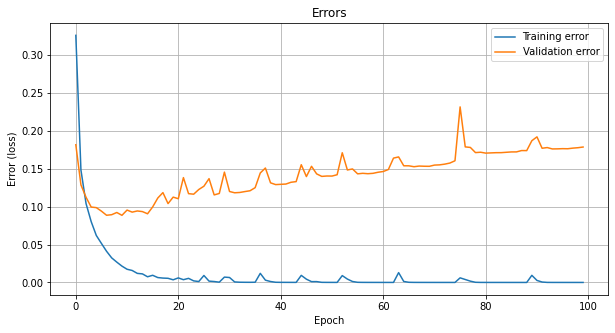

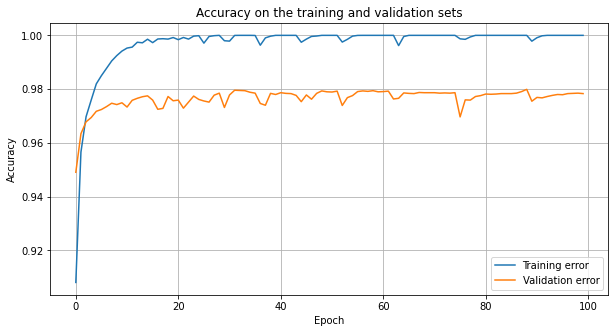

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# MNIS dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalizacja danych

# Data Flattening
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# Simple network
model = Sequential([
    Dense(128, activation='relu', input_shape=(28*28,)),
    Dense(10, activation='softmax')  # Warstwa wyjściowa
])

# Compilation
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Training the model
history = model.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=64, verbose=1)

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training error')
plt.plot(history.history['val_loss'], label='Validation error')
plt.title('Errors')
plt.xlabel('Epoch')
plt.ylabel('Error (loss)')
plt.legend()
plt.grid(True)
plt.show()

# Wizualizacja dokładności (opcjonalnie)
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training error')
plt.plot(history.history['val_accuracy'], label='Validation error')
plt.title('Accuracy on the training and validation sets')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


## How Neural Network Architecture Impacts Predictions

### 1. **Number of Layers**
- **Shallow Networks**:
  - Work well for problems with simple patterns and relationships.
  - Examples: Predicting linear trends or simple classifications.
- **Deep Networks**:
  - Better suited for complex problems with intricate relationships (e.g., image recognition, speech synthesis).
  - More layers allow the network to extract and combine high-level features from data.

### 2. **Number of Neurons in Each Layer**
- **Too Few Neurons**:
  - Can lead to underfitting, where the network cannot capture the complexity of the data.
  - Example: A network with insufficient neurons might fail to recognize subtle patterns in images.
- **Too Many Neurons**:
  - Can lead to overfitting, where the network memorizes the training data rather than generalizing to new data.
  - Example: A network may perform perfectly on training data but fail on unseen examples.

### 3. **Choice of Activation Functions**
- Activation functions determine how the data flows and transforms through the network.
  - Example: ReLU is effective for deep networks because it mitigates the vanishing gradient problem, enabling better training of deep layers.
- The choice of activation function impacts the ability of the network to model complex, non-linear patterns.


### 4. **Regularization Techniques**
- Regularization (e.g., dropout, L2 regularization) prevents overfitting and ensures the network generalizes well to unseen data.
  - Example: Dropout randomly disables a fraction of neurons during training, forcing the network to learn robust features.

### 5. **Depth vs. Breadth**
- **Deeper Networks**:
  - Learn hierarchical patterns (e.g., edges → shapes → objects in images).
- **Wider Networks**:
  - Capture more features at the same level but may fail to model hierarchical relationships.

### 6. **Connectivity and Architecture**
- Specialized architectures like Convolutional Neural Networks (CNNs) for images or Recurrent Neural Networks (RNNs) for sequential data influence predictions by tailoring the network to specific data structures.
  - Example: CNNs are excellent at identifying spatial patterns in images.

### **Summary**
The architecture of a neural network significantly impacts its ability to make accurate predictions. Factors like the number of layers, neurons


See for examples: https://alexlenail.me/NN-SVG/

See for some examples: https://playground.tensorflow.org

Number of layers: 1, Number of neurons: 32, Validation accuracy: 0.9560, Time: 6.54s
Number of layers: 1, Number of neurons: 64, Validation accuracy: 0.9648, Time: 6.97s
Number of layers: 1, Number of neurons: 128, Validation accuracy: 0.9737, Time: 9.05s
Number of layers: 2, Number of neurons: 32, Validation accuracy: 0.9603, Time: 6.88s
Number of layers: 2, Number of neurons: 64, Validation accuracy: 0.9633, Time: 7.44s
Number of layers: 2, Number of neurons: 128, Validation accuracy: 0.9773, Time: 9.38s
Number of layers: 3, Number of neurons: 32, Validation accuracy: 0.9607, Time: 8.57s
Number of layers: 3, Number of neurons: 64, Validation accuracy: 0.9705, Time: 9.37s
Number of layers: 3, Number of neurons: 128, Validation accuracy: 0.9737, Time: 11.29s


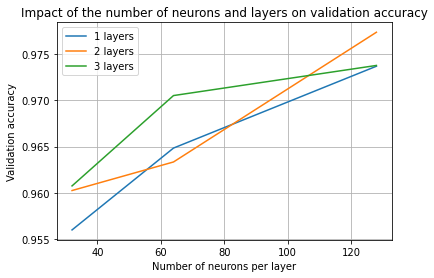

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from time import time

# Loading and preparing the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizing the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Splitting the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Reshaping input data
x_train = x_train.reshape(-1, 28*28)
x_val = x_val.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# Parameters to test
layer_configs = [1, 2, 3]  # Number of layers
neurons_configs = [32, 64, 128]  # Number of neurons per layer

results = []

# Testing different configurations
for num_layers in layer_configs:
    for num_neurons in neurons_configs:
        start = time()
        # Building the model
        model = Sequential()
        model.add(Dense(num_neurons, activation='relu', input_shape=(28*28,)))
        for _ in range(num_layers - 1):
            model.add(Dense(num_neurons, activation='relu'))
        model.add(Dense(10, activation='softmax'))  # Output layer
        
        # Compiling the model
        model.compile(optimizer=Adam(learning_rate=0.001), 
                      loss='sparse_categorical_crossentropy', 
                      metrics=['accuracy'])
        
        # Training the model
        history = model.fit(x_train, y_train, 
                            validation_data=(x_val, y_val), 
                            epochs=5, batch_size=64, verbose=0)
        
        # Evaluating the model
        val_accuracy = history.history['val_accuracy'][-1]
        results.append((num_layers, num_neurons, val_accuracy))
        end = time()
        print(f"Number of layers: {num_layers}, Number of neurons: {num_neurons}, Validation accuracy: {val_accuracy:.4f}, Time: {end-start:.2f}s")
        

# Visualizing the results
results_array = np.array(results)
for num_layers in layer_configs:
    plt.plot(neurons_configs, results_array[results_array[:, 0] == num_layers][:, 2], label=f'{num_layers} layers')

plt.title('Impact of the number of neurons and layers on validation accuracy')
plt.xlabel('Number of neurons per layer')
plt.ylabel('Validation accuracy')
plt.legend()
plt.grid(True)
plt.show()


Accuracy (FC): 0.9772, Time: 0.04 s
Accuracy (CNN): 0.9877, Time: 0.08 s
Accuracy (RNN): 0.9568, Time: 0.14 s
Accuracy (LSTM): 0.9817, Time: 118.47 s


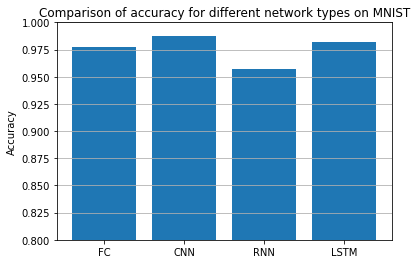

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, SimpleRNN, LSTM, Reshape
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from time import time

# Loading and preparing MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Adding channel dimension for CNN
x_train_cnn = x_train[..., np.newaxis]
x_test_cnn = x_test[..., np.newaxis]

# Preparing data for RNN
x_train_rnn = x_train.reshape(-1, 28, 28)
x_test_rnn = x_test.reshape(-1, 28, 28)

# Function to train and evaluate a model
def train_and_evaluate(model, x_train, y_train, x_test, y_test, epochs=5):
    model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, verbose=0)
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    return test_accuracy

start = time()
# Fully Connected Network (FC)
fc_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
end = time()

fc_accuracy = train_and_evaluate(fc_model, x_train, y_train, x_test, y_test)
print(f"Accuracy (FC): {fc_accuracy:.4f}, Time: {end-start:.2f} s")

start = time()
# Convolutional Neural Network (CNN)
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
end = time()

cnn_accuracy = train_and_evaluate(cnn_model, x_train_cnn, y_train, x_test_cnn, y_test)
print(f"Accuracy (CNN): {cnn_accuracy:.4f}, Time: {end-start:.2f} s")

start = time()
# Recurrent Neural Network (RNN)
rnn_model = Sequential([
    SimpleRNN(128, activation='tanh', input_shape=(28, 28)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
end = time()

rnn_accuracy = train_and_evaluate(rnn_model, x_train_rnn, y_train, x_test_rnn, y_test)
print(f"Accuracy (RNN): {rnn_accuracy:.4f}, Time: {end-start:.2f} s")
start = time()
# LSTM Network
lstm_model = Sequential([
    LSTM(128, activation='tanh', input_shape=(28, 28)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

lstm_accuracy = train_and_evaluate(lstm_model, x_train_rnn, y_train, x_test_rnn, y_test)
end = time()
print(f"Accuracy (LSTM): {lstm_accuracy:.4f}, Time: {end-start:.2f} s")

# Comparing results
types = ['FC', 'CNN', 'RNN', 'LSTM']
accuracies = [fc_accuracy, cnn_accuracy, rnn_accuracy, lstm_accuracy]

plt.bar(types, accuracies)
plt.title('Comparison of accuracy for different network types on MNIST')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.grid(axis='y')
plt.show()


## Common Activation Functions

Activation functions are a crucial component of neural networks, as they introduce non-linearity, enabling the network to model complex relationships in the data.

### 1. **Sigmoid Function**
- **Formula**: $ f(x) = \frac{1}{1 + e^{-x}} $
- **Output Range**: (0, 1)
- **Use Case**:
  - Commonly used in the output layer for binary classification problems.
- **Pros**:
  - Smooth gradient, useful for probability-based outputs.
- **Cons**:
  - Prone to the vanishing gradient problem in deep networks.

### 2. **ReLU (Rectified Linear Unit)**
- **Formula**: $ f(x) = \max(0, x) $
- **Output Range**: [0, $ \infty $)
- **Use Case**:
  - Widely used in hidden layers of deep networks.
- **Pros**:
  - Efficient computation and mitigates the vanishing gradient problem.
- **Cons**:
  - Can cause dead neurons (outputs stuck at 0) if weights are poorly initialized.

### 3. **Tanh (Hyperbolic Tangent)**
- **Formula**: $ f(x) = \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} $
- **Output Range**: (-1, 1)
- **Use Case**:
  - Used in cases where negative values are meaningful.
- **Pros**:
  - Zero-centered output, making optimization easier than sigmoid.
- **Cons**:
  - Still prone to the vanishing gradient problem.

### 4. **Softmax Function**
- **Formula**: $ f(x_i) = \frac{e^{x_i}}{\sum_{j} e^{x_j}} $ for $ i = 1, 2, \dots, n $
- **Output Range**: (0, 1), with the sum of outputs equal to 1.
- **Use Case**:
  - Used in the output layer for multi-class classification problems.
- **Pros**:
  - Outputs probabilities that sum to 1.
- **Cons**:
  - Computationally expensive for a large number of classes.

### 5. **Leaky ReLU**
- **Formula**: $ f(x) = x \text{ if } x > 0, \alpha x \text{ if } x \leq 0 $, where $ \alpha $ is a small positive constant (e.g., 0.01).
- **Output Range**: (-$ \infty $, $ \infty $)
- **Use Case**:
  - Mitigates the dead neuron issue in ReLU by allowing small gradients when \( x \leq 0 \).
- **Pros**:
  - Improves learning in deep networks.
- **Cons**:
  - Slightly more complex computation than standard ReLU.

### **Choosing an Activation Function**
- **Hidden Layers**: ReLU or Leaky ReLU are popular choices.
- **Output Layer**:
  - **Binary Classification**: Sigmoid.
  - **Multi-Class Classification**: Softmax.
  - **Regression**: Linear activation (no activation).

Activation functions should be selected based on the problem at hand, as they greatly influence how effectively the network learns and generalizes.


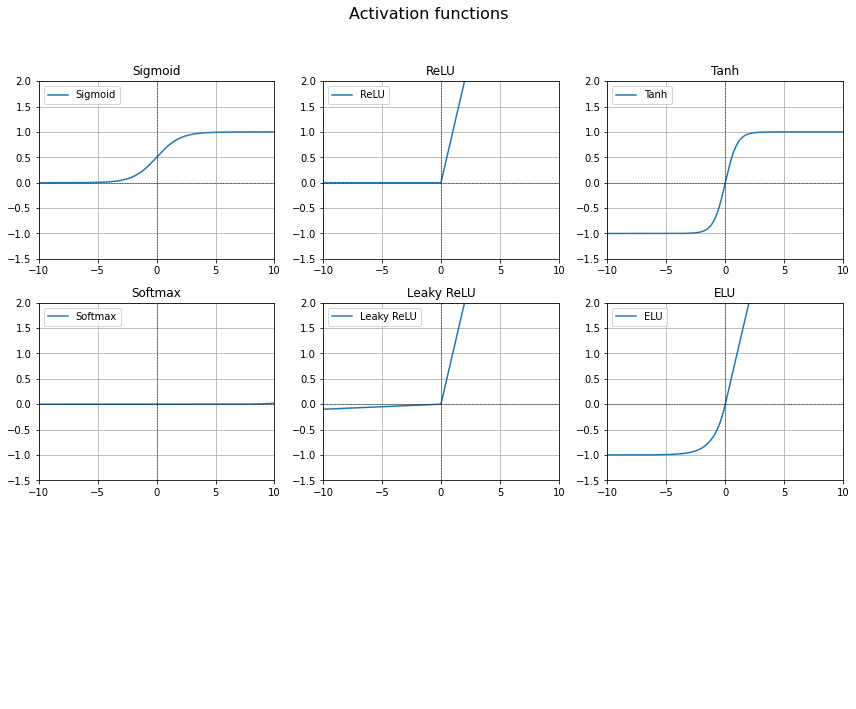

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum()

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def swish(x):
    return x * sigmoid(x)

# Define input range
x = np.linspace(-10, 10, 1000)

# Compute function outputs
functions = {
    "Sigmoid": sigmoid(x),
    "ReLU": relu(x),
    "Tanh": tanh(x),
    "Softmax": softmax(x),  # Softmax applied to all x values (illustrative purpose)
    "Leaky ReLU": leaky_relu(x),
    "ELU": elu(x),
}

# Create plots
fig, axes = plt.subplots(3, 3, figsize=(12, 10))
axes = axes.flatten()

for i, (name, output) in enumerate(functions.items()):
    ax = axes[i]
    ax.plot(x, output, label=name)
    ax.axhline(0, color='black', linewidth=0.5, linestyle='--')
    ax.axvline(0, color='black', linewidth=0.5, linestyle='--')
    ax.set_title(name, fontsize=12)
    ax.set_xlim(-10, 10)
    ax.set_ylim(-1.5, 2.0)
    ax.legend(loc="upper left")
    ax.grid(True)

# Hide any extra subplots (if fewer than 9)
for j in range(len(functions), len(axes)):
    axes[j].axis('off')

fig.suptitle("Activation functions", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Training model with activation function: relu
Training model with activation function: sigmoid
Training model with activation function: tanh
Training model with activation function: swish


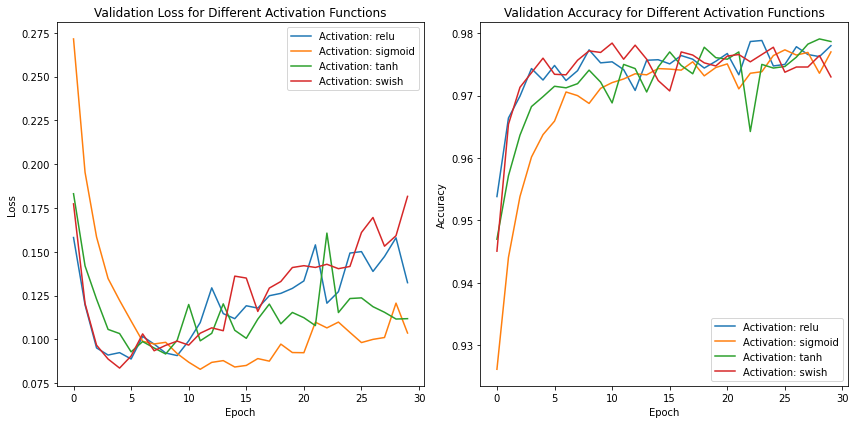

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Loading and preparing MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalizing data

# Flattening input data
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# List of activation functions to test
activation_functions = ['relu', 'sigmoid', 'tanh', 'swish']
histories = {}

# Function to build and train the model
def build_and_train_model(activation):
    model = Sequential([
        Dense(128, activation=activation, input_shape=(28*28,)),
        Dense(64, activation=activation),
        Dense(10, activation='softmax')  # Output layer
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train, validation_split=0.2, epochs=30, batch_size=64, verbose=0)
    return history

# Training models with different activation functions
for activation in activation_functions:
    print(f"Training model with activation function: {activation}")
    histories[activation] = build_and_train_model(activation)

# Visualizing results
plt.figure(figsize=(12, 6))

# Validation loss plot
plt.subplot(1, 2, 1)
for activation in histories:
    plt.plot(histories[activation].history['val_loss'], label=f'Activation: {activation}')
plt.title('Validation Loss for Different Activation Functions')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Validation accuracy plot
plt.subplot(1, 2, 2)
for activation in histories:
    plt.plot(histories[activation].history['val_accuracy'], label=f'Activation: {activation}')
plt.title('Validation Accuracy for Different Activation Functions')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


## How Neural Networks Learn

Neural networks learn by iteratively adjusting their internal parameters (weights and biases) to minimize the error in their predictions. This process can be broken down into several key steps:

### 1. **Forward Propagation**
- Data flows through the network from the input layer, through hidden layers, to the output layer.
- At each neuron, the following operations occur:
  1. **Weighted Sum**: The neuron computes a weighted sum of its inputs.
     $$
     z = \sum (w_i \cdot x_i) + b
     $$
     where $ w_i $ are the weights, $ x_i $ are the inputs, and $ b $ is the bias.
  2. **Activation**: The weighted sum is passed through an activation function to introduce non-linearity.
- The output layer produces the final prediction.

### 2. **Loss Function**
- The loss function measures how far the network's predictions are from the true values. Those are actually the same to what we have so far used in regression and classification.
- Common loss functions:
  - **Mean Squared Error (MSE)**: For regression problems.
  - **Cross-Entropy Loss**: For classification problems.

### 3. **Backpropagation**
- Backpropagation calculates how much each weight and bias contributed to the error.
- It uses the **chain rule** of calculus to compute gradients (partial derivatives of the loss function with respect to weights and biases).
- Gradients indicate the direction and magnitude of adjustments needed to reduce the error.


### 4. **Iterative Learning**
- The network repeats forward propagation, loss computation, backpropagation, and gradient descent for multiple iterations (epochs) until:
  - The loss function reaches a minimum.
  - The network achieves satisfactory accuracy on the training data.

### 5. **Key Concepts**
- **Overfitting**: When the network memorizes training data instead of generalizing to unseen data. Mitigated by techniques like dropout or regularization.
- **Learning Rate**: Choosing an appropriate learning rate is critical. Too high causes unstable training; too low leads to slow convergence.


### Summary
Neural networks learn by minimizing the error in predictions through forward propagation, loss computation, backpropagation, and gradient descent. This iterative process enables the network to adjust its internal parameters and improve performance over time.


The network learns as follows:

    The neural network starts by making random guesses.
    
    It evaluates how far off the guesses are (like checking how far the dart landed from the target).
    
    It adjusts its aim (weights) to improve over time.
   

## Example of Forward Propagation

### Problem Statement
We have a simple neural network with:
- **Input Layer**: 2 neurons ($ x_1, x_2 $)
- **Hidden Layer**: 2 neurons ($ h_1, h_2 $) with a ReLU activation function.
- **Output Layer**: 1 neuron ($ y $) with no activation function.

### Weights and Biases
- Input to Hidden Layer:
  - Weights: $ w_{11}, w_{12}, w_{21}, w_{22} $
  - Biases: $ b_1, b_2 $
- Hidden to Output Layer:
  - Weights: $ w_{h1}, w_{h2} $
  - Bias: $ b_o $

### Step-by-Step Calculation
#### 1. **Inputs**
Let the inputs be:
$$
x_1 = 1, \quad x_2 = 2
$$

#### 2. **Hidden Layer Calculations**
For each hidden neuron, compute the weighted sum ($ z $) and apply the ReLU activation:
$$
z_1 = w_{11} \cdot x_1 + w_{12} \cdot x_2 + b_1
$$
$$
h_1 = \text{ReLU}(z_1) = \max(0, z_1)
$$

$$
z_2 = w_{21} \cdot x_1 + w_{22} \cdot x_2 + b_2
$$
$$
h_2 = \text{ReLU}(z_2) = \max(0, z_2)
$$

#### 3. **Output Layer Calculation**
Compute the weighted sum of the hidden layer outputs and add the bias:
$$
y = w_{h1} \cdot h_1 + w_{h2} \cdot h_2 + b_o
$$

#### 4. **Example Values**
Let the weights and biases be:
$$
w_{11} = 0.5, \quad w_{12} = -0.6, \quad w_{21} = 0.8, \quad w_{22} = 0.1, \quad b_1 = 0.1, \quad b_2 = -0.3
$$
$$
w_{h1} = 0.7, \quad w_{h2} = -0.4, \quad b_o = 0.2
$$

Perform the calculations:
1. Hidden Layer:
   $$
   z_1 = (0.5 \cdot 1) + (-0.6 \cdot 2) + 0.1 = -0.6
   $$
   $$
   h_1 = \text{ReLU}(-0.6) = 0
   $$
   $$
   z_2 = (0.8 \cdot 1) + (0.1 \cdot 2) - 0.3 = 0.7
   $$
   $$
   h_2 = \text{ReLU}(0.7) = 0.7
   $$

2. Output Layer:
   $$
   y = (0.7 \cdot 0) + (-0.4 \cdot 0.7) + 0.2 = -0.28
   $$

### Final Output
The output of the network is:
$$
y = -0.28
$$


<IPython.core.display.Javascript object>


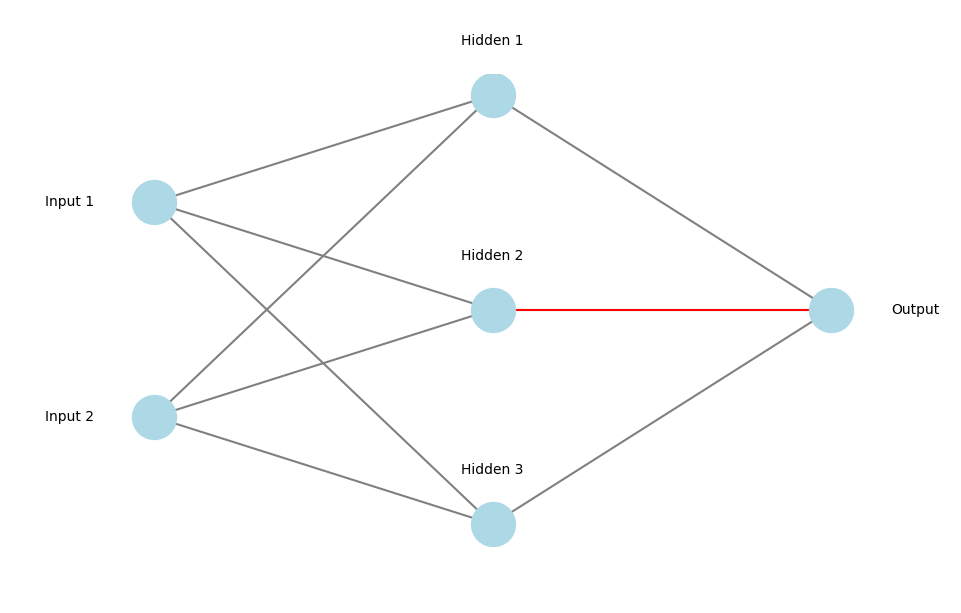

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Define the neural network structure
input_neurons = 2
hidden_neurons = 3
output_neurons = 1

# Define weights and biases
weights_input_hidden = np.array([[0.5, -0.2, 0.1], [0.8, 0.3, -0.5]])
weights_hidden_output = np.array([[0.7], [-0.6], [0.2]])
bias_hidden = np.array([0.1, -0.1, 0.2])
bias_output = np.array([0.5])

# Activation function (ReLU)
def relu(x):
    return np.maximum(0, x)

# Forward propagation function
def forward_propagation(x):
    hidden_input = np.dot(x, weights_input_hidden) + bias_hidden
    hidden_output = relu(hidden_input)
    output = np.dot(hidden_output, weights_hidden_output) + bias_output
    return hidden_input, hidden_output, output

# Input data
input_data = np.array([[1.0, 2.0]])

# Perform forward propagation
hidden_input, hidden_output, output = forward_propagation(input_data)

# Create the figure
fig, ax = plt.subplots(figsize=(6, 6))
ax.axis('off')

# Define positions for the neurons
input_positions = [(0, 2), (0, 0)]
hidden_positions = [(2, 3), (2, 1), (2, -1)]
output_positions = [(4, 1)]

# Combine all positions
all_positions = input_positions + hidden_positions + output_positions

# Draw the network
neurons = ax.scatter(*zip(*all_positions), s=1000, c='lightblue', zorder=3)

# Draw connections
connections = []
for i, (x1, y1) in enumerate(input_positions):
    for j, (x2, y2) in enumerate(hidden_positions):
        connections.append(ax.plot([x1, x2], [y1, y2], color='gray', zorder=1)[0])
for i, (x1, y1) in enumerate(hidden_positions):
    for j, (x2, y2) in enumerate(output_positions):
        connections.append(ax.plot([x1, x2], [y1, y2], color='gray', zorder=1)[0])

# Add text labels
for i, (x, y) in enumerate(input_positions):
    ax.text(x - 0.5, y, f"Input {i+1}", ha='center', va='center', fontsize=10)
for i, (x, y) in enumerate(hidden_positions):
    ax.text(x, y + 0.5, f"Hidden {i+1}", ha='center', va='center', fontsize=10)
for i, (x, y) in enumerate(output_positions):
    ax.text(x + 0.5, y, f"Output", ha='center', va='center', fontsize=10)

# Animation function
def update(frame):
    if frame < len(hidden_input[0]):
        # Highlight active connection to hidden neurons
        for i, line in enumerate(connections[:len(input_positions) * len(hidden_positions)]):
            line.set_color('red' if i // len(hidden_positions) == frame else 'gray')
    elif frame < len(hidden_input[0]) + len(hidden_output[0]):
        # Highlight active connection to output neurons
        idx = frame - len(hidden_input[0])
        for i, line in enumerate(connections[len(input_positions) * len(hidden_positions):]):
            line.set_color('red' if i // len(output_positions) == idx else 'gray')
    else:
        # Reset all connections
        for line in connections:
            line.set_color('gray')

ani = animation.FuncAnimation(fig, update, frames=range(len(hidden_input[0]) + len(hidden_output[0]) + 1), interval=500, repeat=True)

plt.show()


### Backpropagation

The idea of backpropagation is to allow the network to "learn". Backpropagation (short for “backward propagation of errors”) is an optimization algorithm that computes the gradient of the loss function with respect to each weight and bias in the network. It ensures that weights are updated in the direction that reduces the error.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Load the Iris Dataset
iris = load_iris()
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Target (species: 0, 1, 2)

# Step 2: Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 3: Standardize the Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Create and Train the Neural Network
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = mlp.predict(X_test)

# Step 6: Evaluate the Model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Step 7: Visualize the Decision Boundary (Using First Two Features for Simplicity)
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Reduce to First Two Features for Visualization
X_train_vis = X_train[:, :2]
X_test_vis = X_test[:, :2]
mlp_vis = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', max_iter=1000, random_state=42)
mlp_vis.fit(X_train_vis, y_train)

# Plot Decision Boundary
plot_decision_boundary(X_test_vis, y_test, mlp_vis)


Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



## Advanced Neural Network Architectures: RNNs and CNNs

### 1. **Convolutional Neural Networks (CNNs)**

**Purpose**: Designed for image and spatial data processing.

#### Key Components:
- **Convolution Layers**:
  - Detect patterns such as edges, textures, or objects in an image.
  - Apply a small filter (kernel) over the input to create feature maps.
- **Pooling Layers**:
  - Reduce the spatial dimensions of feature maps, retaining important information.
  - Common pooling methods: Max Pooling, Average Pooling.
- **Fully Connected Layers**:
  - Combine extracted features to classify or predict outcomes.
- **Activation Functions**:
  - Often ReLU (Rectified Linear Unit) is used for non-linearity.

#### Example Architecture:
1. **Input Layer**: Takes an image (e.g., 28x28 pixels for MNIST).
2. **Convolution Layer**: Applies filters to extract local patterns.
3. **Pooling Layer**: Down-samples feature maps to reduce complexity.
4. **Convolution + Pooling Layers**: Repeat for deeper feature extraction.
5. **Fully Connected Layer**: Maps features to output classes.

#### Use Cases:
- **Image Classification**: Identifying objects in an image (e.g., cats vs. dogs).
- **Object Detection**: Locating objects in an image (e.g., bounding boxes).
- **Medical Imaging**: Detecting diseases from X-rays or MRIs.

---

### 2. **Recurrent Neural Networks (RNNs)**

**Purpose**: Designed for sequential and time-series data processing.

#### Key Components:
- **Recurrent Connections**:
  - Each neuron remembers information from the previous time step.
  - Creates a loop that passes information forward in the sequence.
- **Hidden State**:
  - Maintains context from previous inputs, enabling sequence learning.
- **Variants**:
  - **LSTMs (Long Short-Term Memory)**: Mitigate vanishing gradients with gates that control information flow.
  - **GRUs (Gated Recurrent Units)**: Similar to LSTMs but with fewer parameters.

#### Example Architecture:
1. **Input Layer**: Sequential data (e.g., text or stock prices).
2. **RNN/LSTM/GRU Layer**: Processes the sequence one step at a time.
3. **Fully Connected Layer**: Maps the sequence to a target output.

#### Use Cases:
- **Natural Language Processing**: Language modeling, translation, sentiment analysis.
- **Time-Series Prediction**: Forecasting stock prices or weather patterns.
- **Speech Recognition**: Converting spoken words to text.

---

### 3. **Differences Between CNNs and RNNs**

| Feature                     | CNN                                  | RNN                                  |
|-----------------------------|--------------------------------------|--------------------------------------|
| **Input Type**              | Images, spatial data                | Sequential, temporal data            |
| **Structure**               | Hierarchical layers                 | Recurrence with loops                |
| **Key Strength**            | Captures spatial patterns           | Learns temporal dependencies         |
| **Example Applications**    | Image classification, object detection | Language modeling, time-series prediction |

---

### 4. **Combined Architectures**
- **CNN + RNN**:
  - Combine CNNs for feature extraction and RNNs for sequence modeling.
  - **Example**: Video analysis (CNN for spatial features, RNN for temporal patterns).
- **CNN + Fully Connected**:
  - Used in tasks like image classification where the CNN extracts features and the fully connected layer classifies.

These architectures represent specialized neural networks tailored to solve complex real-world problems effectively.


<img src='img/CNN.png' />

<img src='img/RNN.png' />

## Challenges and Limitations of Neural Networks

While neural networks are powerful tools for solving complex problems, they are not without challenges and limitations. Understanding these can help in designing better models and managing expectations.

---

### 1. **Data Requirements**
- Neural networks require large amounts of high-quality labeled data to train effectively.
- **Example**: Image classification tasks often need thousands of labeled images for each category.
- **Challenge**: Acquiring and labeling such datasets can be expensive and time-consuming.

---

### 2. **Computational Cost**
- Neural networks, especially deep networks, are computationally intensive to train.
- **Hardware Requirements**:
  - Training models often requires GPUs or TPUs for parallel processing.
- **Challenge**: High computational costs can limit accessibility for individuals or organizations without significant resources.

---

### 3. **Overfitting**
- Neural networks can memorize training data rather than generalizing to unseen data.
- **Example**: A network might achieve near-perfect accuracy on training data but fail on test data.
- **Solution**: Techniques like regularization, dropout, and early stopping are used to mitigate this.

---

### 4. **Black Box Nature**
- Neural networks are often criticized for their lack of interpretability.
- **Problem**: It is difficult to understand how a neural network arrives at a decision, especially in critical areas like healthcare or finance.
- **Emerging Solutions**: Explainable AI (XAI) and visualization tools aim to make models more transparent.

---

### 5. **Hyperparameter Sensitivity**
- Neural networks require careful tuning of hyperparameters such as learning rate, number of layers, and neurons.
- **Challenge**: Finding the optimal combination often involves trial-and-error or computationally expensive optimization techniques.

---

### 6. **Energy Consumption**
- Training large neural networks can consume significant energy, contributing to environmental concerns.
- **Example**: Training a single large language model can have a carbon footprint comparable to multiple transatlantic flights.
- **Solution**: Research into efficient algorithms and hardware can help reduce energy usage.



### Summary
Neural networks are powerful machine learning tools inspired by the human brain, capable of solving complex problems across various domains. They consist of interconnected layers of artificial neurons, with each layer progressively transforming input data to produce meaningful outputs. These architectures range from simple feedforward networks to advanced designs like Convolutional Neural Networks (CNNs) for image processing and Recurrent Neural Networks (RNNs) for sequential data.

The strength of neural networks lies in their ability to learn from data, adapt to various tasks, and make predictions or classifications with high accuracy. They are widely used in real-world applications such as image recognition, natural language processing, autonomous vehicles, and healthcare.

However, neural networks come with challenges:

    High Data and Computational Requirements: Training deep networks demands large datasets and substantial computational resources.
    
    Overfitting and Bias: Ensuring generalization and fairness requires careful data preparation and model tuning.
    
    Interpretability: Their “black box” nature makes understanding decision-making processes difficult, particularly in critical applications.
    
    Energy and Environmental Impact: Training large models can be resource-intensive, prompting a need for sustainable solutions.

Despite these limitations, advancements in techniques like regularization, explainable AI, and efficient hardware continue to address these challenges, making neural networks more accessible, robust, and interpretable.

By understanding their architecture, learning process, and limitations, we can better harness the power of neural networks for solving real-world problems and driving innovation across industries.
